In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import sys, json, dill, re, random, time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### plot fitting time

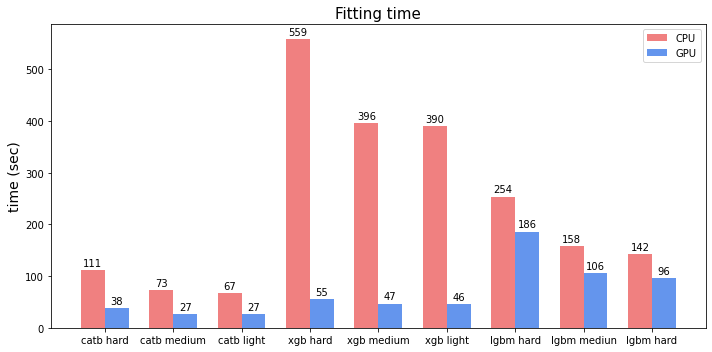

In [4]:
labels = ['catb hard', 'catb medium', 'catb light', 'xgb hard', 'xgb medium', 'xgb light',
          'lgbm hard', 'lgbm mediun', 'lgbm hard']
x = np.arange(len(labels))

gpu_time = [38, 27, 27, 55, 47, 46, 186, 106, 96]
cpu_time = [111, 73, 67, 559, 396, 390, 254, 158, 142]
width = 0.35
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, cpu_time, width, color='lightcoral', label='CPU')
rects2 = ax.bar(x + width/2, gpu_time, width, color='cornflowerblue', label='GPU')
ax.set_ylabel('time (sec)', fontsize=14)
ax.set_title('Fitting time', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
fig.tight_layout()
plt.show()

#### plot fitting time with transfer time

In [5]:
all_time = [38, 164, 318, 55, 257, 850, 115, 378, 799]
transfer_time = [8, 34, 70, 25, 180, 660, 25, 142, 492]
fit_time_gpu = [x - y for x, y in zip(all_time, transfer_time)]
fit_time_gpu

[30, 130, 248, 30, 77, 190, 90, 236, 307]

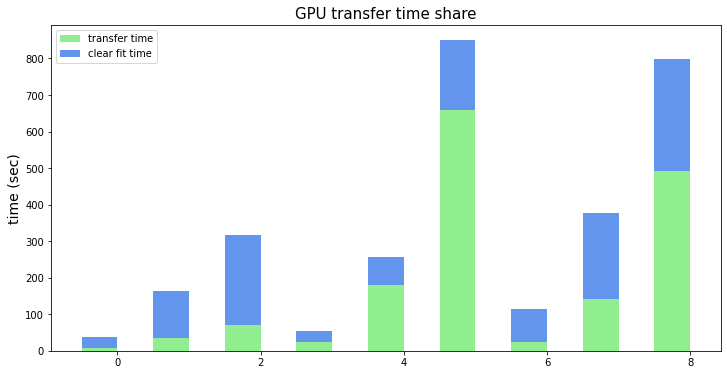

In [7]:
width = 0.50
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x - width/2, transfer_time, width, color='lightgreen', label='transfer time')
ax.bar(x - width/2, fit_time_gpu, width, bottom=transfer_time, color='cornflowerblue', label='clear fit time')
#ax.bar(x + width/2, fit_time_cpu, width, color='cornflowerblue', label='GPU')

ax.set_ylabel('time (sec)', fontsize=14)
ax.set_title('GPU transfer time share', fontsize=15)
ax.legend()

plt.show()
# catb быстрее всех перекладывает даже большие данные и поэтому быстрее обучается

In [8]:
fit_time_cpu = [111, 569, 917, 559, 4849, 7050, 254, 499, 1108] # 500, 2M, 3M

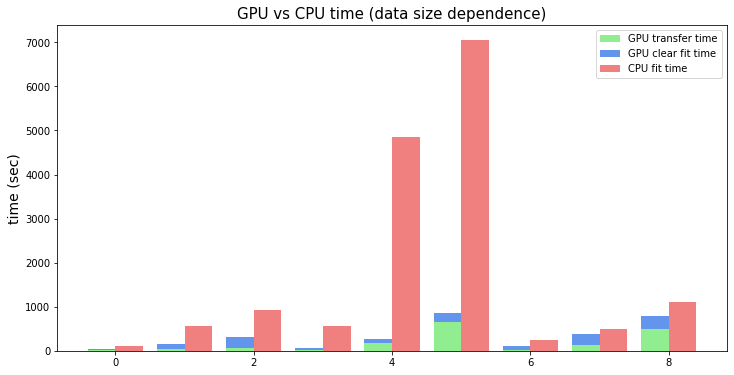

In [9]:
width = 0.40
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x - width/2, transfer_time, width, color='lightgreen', label='GPU transfer time')
ax.bar(x - width/2, fit_time_gpu, width, bottom=transfer_time, color='cornflowerblue', label='GPU clear fit time')
ax.bar(x + width/2, fit_time_cpu, width, color='lightcoral', label='CPU fit time')

ax.set_ylabel('time (sec)', fontsize=14)
ax.set_title('GPU vs CPU time (data size dependence)', fontsize=15)
ax.legend()

plt.show()

#### plot inference time

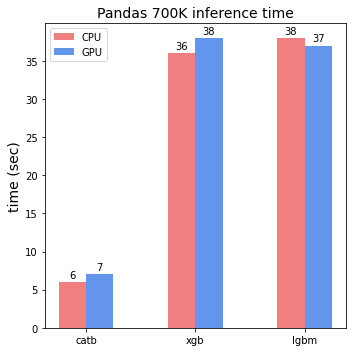

In [10]:
labels = ['catb', 'xgb', 'lgbm']
x = np.arange(len(labels))

inference_cpu = [6,36,38]
inference_gpu = [7,38,37]
width = 0.25

fig, ax = plt.subplots(figsize=(5,5))
rects1 = ax.bar(x - width/2, inference_cpu, width, color='lightcoral', label='CPU')
rects2 = ax.bar(x + width/2, inference_gpu, width, color='cornflowerblue', label='GPU')

ax.set_ylabel('time (sec)', fontsize=14)
ax.set_title('Pandas 700K inference time', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

fig.tight_layout()
plt.show()

#### get model size stats (set 1 - hard)

In [11]:
catb_cpu_size = [1.72, 17.1, 11.6, 21.6, 7.76, 8.51, 15.5, 1.8, 15.4, 9.42]
len(catb_cpu_size), np.min(catb_cpu_size), np.mean(catb_cpu_size), np.max(catb_cpu_size)

(10, 1.72, 11.041, 21.6)

In [12]:
catb_gpu_size = [943, 983, 955, 975, 932, 888, 927, 951, 916, 922]
len(catb_gpu_size), np.min(catb_gpu_size), np.mean(catb_gpu_size), np.max(catb_gpu_size)

(10, 888, 939.2, 983)

In [13]:
xgb_cpu_size = [4.23, 4.21, 4.23, 4.24, 4.21, 4.23, 4.24, 4.23, 4.22, 4.22]
len(xgb_cpu_size), np.min(xgb_cpu_size), np.mean(xgb_cpu_size), np.max(xgb_cpu_size)

(10, 4.21, 4.226000000000001, 4.24)

In [14]:
xgb_gpu_size = [4.25, 4.24, 4.23, 4.23, 4.23, 4.23, 4.24, 4.24, 4.24, 4.23]
len(xgb_gpu_size), np.min(xgb_gpu_size), np.mean(xgb_gpu_size), np.max(xgb_gpu_size)

(10, 4.23, 4.236, 4.25)

In [15]:
lgbm_cpu_size, lgbm_gpu_size = [7.18]*10, [7.18]*10

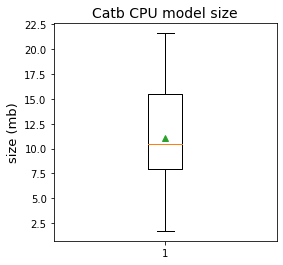

In [16]:
fig = plt.figure(1, figsize=(4, 4))
ax = fig.add_subplot(1,1,1)  
bp = ax.boxplot(catb_cpu_size, showmeans=True)
plt.ylabel('size (mb)', fontsize=13)
plt.title("Catb CPU model size", fontsize=14)
plt.show()

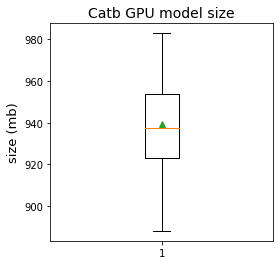

In [17]:
fig = plt.figure(1, figsize=(4, 4))
ax = fig.add_subplot(1,1,1)  
bp = ax.boxplot(catb_gpu_size, showmeans=True)
plt.ylabel('size (mb)', fontsize=13)
plt.title("Catb GPU model size", fontsize=14)
plt.show()

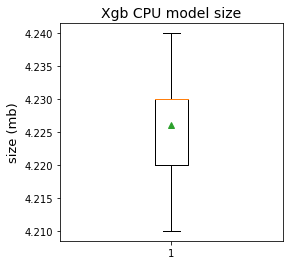

In [18]:
fig = plt.figure(1, figsize=(4, 4))
ax = fig.add_subplot(1,1,1)  
bp = ax.boxplot(xgb_cpu_size, showmeans=True)
plt.ylabel('size (mb)', fontsize=13)
plt.title("Xgb CPU model size", fontsize=14)
plt.show()
# отличия в несколько байт

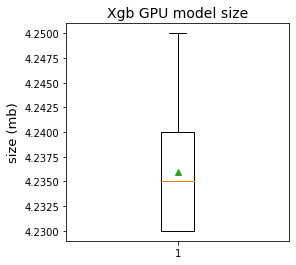

In [19]:
fig = plt.figure(1, figsize=(4, 4))
ax = fig.add_subplot(1,1,1)  
bp = ax.boxplot(xgb_gpu_size, showmeans=True)
plt.ylabel('size (mb)', fontsize=13)
plt.title("Xgb GPU model size", fontsize=14)
plt.show()
# отличия в несколько байт

#### score corr CPU and GPU

In [20]:
catb_corr_cpu = [0.8805697346604261, 0.8835630469354804, 0.8793057900331437, 0.8807245380850102, 0.8822962517930055, 0.8752681091828062, 0.8816202139173743, 0.8793100702689874, 0.8753617541504112, 0.8805697346604261, 0.8825558449596235, 0.8772593705768275, 0.873811516062748, 0.8798111625780297, 0.8770230149918027, 0.8790043521598039, 0.8747315153878521, 0.8749872802087107, 0.8835630469354804, 0.8825558449596235, 0.8757467177612394, 0.8743775542580708, 0.8728708055714753, 0.876141573321827, 0.8759651831852246, 0.8771339392923597, 0.8757973537042184, 0.8793057900331437, 0.8772593705768275, 0.8757467177612394, 0.8723139980822625, 0.8778415608920322, 0.8742911863600661, 0.8787235929469559, 0.8735580560520616, 0.869830999263046, 0.8807245380850102, 0.873811516062748, 0.8743775542580708, 0.8723139980822625, 0.8718246398160472, 0.8738704705424927, 0.8735573361259115, 0.873516250966874, 0.8776936960815106, 0.8822962517930055, 0.8798111625780297, 0.8728708055714753, 0.8778415608920322, 0.8718246398160472, 0.872040254468269, 0.8761986844668225, 0.8795784639965117, 0.8742051790207923, 0.8752681091828062, 0.8770230149918027, 0.876141573321827, 0.8742911863600661, 0.8738704705424927, 0.872040254468269, 0.8697325284897525, 0.8735444694546277, 0.8730514896838288, 0.8816202139173743, 0.8790043521598039, 0.8759651831852246, 0.8787235929469559, 0.8735573361259115, 0.8761986844668225, 0.8697325284897525, 0.8679374380579868, 0.8726108505003779, 0.8793100702689874, 0.8747315153878521, 0.8771339392923597, 0.8735580560520616, 0.873516250966874, 0.8795784639965117, 0.8735444694546277, 0.8679374380579868, 0.8745009662825786, 0.8753617541504112, 0.8749872802087107, 0.8757973537042184, 0.869830999263046, 0.8776936960815106, 0.8742051790207923, 0.8730514896838288, 0.8726108505003779, 0.8745009662825786]

In [21]:
catb_corr_gpu = [0.9925001086606898, 0.9936866650607735, 0.9928007123864332, 0.9934053973616274, 0.9931486777129364, 0.9933634573334326, 0.9924314032989086, 0.9934633241902014, 0.9931655614047977, 0.9925001086606898, 0.993233993208527, 0.9932400434268154, 0.9933852289759633, 0.9938518716690855, 0.9934794420579616, 0.9924533615989447, 0.9934729608013466, 0.9944813373251042, 0.9936866650607735, 0.993233993208527, 0.9934280109447212, 0.9934987560111977, 0.9936669682834244, 0.9939492957478383, 0.9923731036104284, 0.9939085091166895, 0.9935595621130455, 0.9928007123864332, 0.9932400434268154, 0.9934280109447212, 0.9941850896554062, 0.9929909180064017, 0.993548124047638, 0.9936708731314036, 0.9933687661874254, 0.9938230103650378, 0.9934053973616274, 0.9933852289759633, 0.9934987560111977, 0.9941850896554062, 0.9942027644211595, 0.9944331644687371, 0.9942058437587326, 0.994451680006343, 0.9939384976848971, 0.9931486777129364, 0.9938518716690855, 0.9936669682834244, 0.9929909180064017, 0.9942027644211595, 0.9948600345337246, 0.9930903355610897, 0.9940829621698196, 0.9931166161560482, 0.9933634573334326, 0.9934794420579616, 0.9939492957478383, 0.993548124047638, 0.9944331644687371, 0.9948600345337246, 0.9934477187699536, 0.9947281144118102, 0.9935590944591528, 0.9924314032989086, 0.9924533615989447, 0.9923731036104284, 0.9936708731314036, 0.9942058437587326, 0.9930903355610897, 0.9934477187699536, 0.9933539943199157, 0.9923820695535107, 0.9934633241902014, 0.9934729608013466, 0.9939085091166895, 0.9933687661874254, 0.994451680006343, 0.9940829621698196, 0.9947281144118102, 0.9933539943199157, 0.9934634661285772, 0.9931655614047977, 0.9944813373251042, 0.9935595621130455, 0.9938230103650378, 0.9939384976848971, 0.9931166161560482, 0.9935590944591528, 0.9923820695535107, 0.9934634661285772]

In [22]:
xgb_corr_cpu = [0.9660928778936482, 0.9662206086078657, 0.9666405110716748, 0.9668419748739283, 0.9660557386676016, 0.9669781225337152, 0.9656910344957818, 0.9659261520688808, 0.9657297891650913, 0.9660928778936482, 0.9661313324305117, 0.966339118003252, 0.9666563819875402, 0.9655835725049888, 0.9674534324176723, 0.966289072810267, 0.9658769335727566, 0.9667473101706964, 0.9662206086078657, 0.9661313324305117, 0.9659831413949549, 0.9660629621774447, 0.9649245201375432, 0.9663674621310782, 0.9656660255411155, 0.9671998241441169, 0.9659252175945449, 0.9666405110716748, 0.966339118003252, 0.9659831413949549, 0.966489304096099, 0.9656391052641811, 0.9659564047534517, 0.9649851163530425, 0.9654132257804222, 0.9654432389128773, 0.9668419748739283, 0.9666563819875402, 0.9660629621774447, 0.966489304096099, 0.964898898567372, 0.9669561505766486, 0.9657889308336648, 0.9662234127013984, 0.9660467484580572, 0.9660557386676016, 0.9655835725049888, 0.9649245201375432, 0.9656391052641811, 0.964898898567372, 0.9657806004056326, 0.9644293133715185, 0.964284175066367, 0.9658176229291634, 0.9669781225337152, 0.9674534324176723, 0.9663674621310782, 0.9659564047534517, 0.9669561505766486, 0.9657806004056326, 0.9664623191019611, 0.9665426816762, 0.966145099753164, 0.9656910344957818, 0.966289072810267, 0.9656660255411155, 0.9649851163530425, 0.9657889308336648, 0.9644293133715185, 0.9664623191019611, 0.9666036072908084, 0.9653762707727291, 0.9659261520688808, 0.9658769335727566, 0.9671998241441169, 0.9654132257804222, 0.9662234127013984, 0.964284175066367, 0.9665426816762, 0.9666036072908084, 0.9665381196310271, 0.9657297891650913, 0.9667473101706964, 0.9659252175945449, 0.9654432389128773, 0.9660467484580572, 0.9658176229291634, 0.966145099753164, 0.9653762707727291, 0.9665381196310271]

In [23]:
xgb_corr_gpu = [0.9659497244495241, 0.9663921375832321, 0.9667202029840678, 0.9663351036509822, 0.9655667802430454, 0.9670279896103293, 0.9664624308639935, 0.9654918711246484, 0.965332155958207, 0.9659497244495241, 0.9660576957809736, 0.966073938655924, 0.9655968814884406, 0.9653488286748008, 0.9654193691645144, 0.9659327880289318, 0.9663650391532168, 0.9655880850774438, 0.9663921375832321, 0.9660576957809736, 0.9664529570264516, 0.9661303206123635, 0.9660307358594515, 0.966919228610711, 0.9667614729581412, 0.9657910667467539, 0.9659431608415944, 0.9667202029840678, 0.966073938655924, 0.9664529570264516, 0.9660861427913371, 0.9659812775182144, 0.9663201997676326, 0.9662367167805691, 0.9652300042556576, 0.966192226633694, 0.9663351036509822, 0.9655968814884406, 0.9661303206123635, 0.9660861427913371, 0.964991671830657, 0.9661022249495094, 0.9670629794716271, 0.9652767864815796, 0.966170456522599, 0.9655667802430454, 0.9653488286748008, 0.9660307358594515, 0.9659812775182144, 0.964991671830657, 0.9661394937075468, 0.9663596831044311, 0.9665060380205079, 0.9661097951275746, 0.9670279896103293, 0.9654193691645144, 0.966919228610711, 0.9663201997676326, 0.9661022249495094, 0.9661394937075468, 0.9666874219831778, 0.9661194462390232, 0.966553423999258, 0.9664624308639935, 0.9659327880289318, 0.9667614729581412, 0.9662367167805691, 0.9670629794716271, 0.9663596831044311, 0.9666874219831778, 0.9663736940819797, 0.9667610906590142, 0.9654918711246484, 0.9663650391532168, 0.9657910667467539, 0.9652300042556576, 0.9652767864815796, 0.9665060380205079, 0.9661194462390232, 0.9663736940819797, 0.9655941827056118, 0.965332155958207, 0.9655880850774438, 0.9659431608415944, 0.966192226633694, 0.966170456522599, 0.9661097951275746, 0.966553423999258, 0.9667610906590142, 0.9655941827056118]

In [24]:
lgbm_corr_cpu = [0.952753649445744, 0.9502624125649255, 0.9531600799435677, 0.9537255358873493, 0.9529516901856668, 0.9530388684431588, 0.9523758023102444, 0.9520393800207924, 0.9553993799712717, 0.952753649445744, 0.9493230153116964, 0.951704033477969, 0.9518305468259111, 0.9508445763129165, 0.9510305513892368, 0.9513885898391026, 0.9496567927462395, 0.9514164624541358, 0.9502624125649255, 0.9493230153116964, 0.9510669730199826, 0.9519702425337627, 0.9502376323064009, 0.9510277496821622, 0.9504591771803615, 0.9498152017601458, 0.9514845433673542, 0.9531600799435677, 0.951704033477969, 0.9510669730199826, 0.9536287882621363, 0.9524969847165576, 0.9526932425355833, 0.9522623470149673, 0.9523734188097577, 0.9533650970803541, 0.9537255358873493, 0.9518305468259111, 0.9519702425337627, 0.9536287882621363, 0.9536276497457736, 0.9527782764566397, 0.9524718790879984, 0.9511274382959518, 0.9530910258336996, 0.9529516901856668, 0.9508445763129165, 0.9502376323064009, 0.9524969847165576, 0.9536276497457736, 0.9527053177067274, 0.9497599791721352, 0.9509551915438352, 0.9515788854676984, 0.9530388684431588, 0.9510305513892368, 0.9510277496821622, 0.9526932425355833, 0.9527782764566397, 0.9527053177067274, 0.9497317224463347, 0.950737908193681, 0.9528505559396108, 0.9523758023102444, 0.9513885898391026, 0.9504591771803615, 0.9522623470149673, 0.9524718790879984, 0.9497599791721352, 0.9497317224463347, 0.9508094151459316, 0.9522955396448696, 0.9520393800207924, 0.9496567927462395, 0.9498152017601458, 0.9523734188097577, 0.9511274382959518, 0.9509551915438352, 0.950737908193681, 0.9508094151459316, 0.9521654616867158, 0.9553993799712717, 0.9514164624541358, 0.9514845433673542, 0.9533650970803541, 0.9530910258336996, 0.9515788854676984, 0.9528505559396108, 0.9522955396448696, 0.9521654616867158]

In [25]:
lgbm_corr_gpu = [0.9528332804054847, 0.9502675410604099, 0.9531672661677241, 0.9537284541140161, 0.9529308688698991, 0.9530187887197968, 0.9523648931786539, 0.9520621956085996, 0.9551050522933383, 0.9528332804054847, 0.9496132019426861, 0.9523017381526788, 0.9516385818937806, 0.9513461959571522, 0.9512634657108465, 0.9515827300494418, 0.9499314760030545, 0.9514562558726034, 0.9502675410604099, 0.9496132019426861, 0.9510550670981095, 0.951967281668568, 0.9502170623913287, 0.9510124817803238, 0.9504434333579937, 0.9497804609267052, 0.9515279110162205, 0.9531672661677241, 0.9523017381526788, 0.9510550670981095, 0.953611074039207, 0.9525149937482196, 0.9526959072343046, 0.9522374634240522, 0.9523547810653799, 0.9533688898261453, 0.9537284541140161, 0.9516385818937806, 0.951967281668568, 0.953611074039207, 0.953620813807505, 0.9527412547303512, 0.9524689982240275, 0.9511205410842394, 0.953212452652762, 0.9529308688698991, 0.9513461959571522, 0.9502170623913287, 0.9525149937482196, 0.953620813807505, 0.9526712741935045, 0.949759956281738, 0.9509581339881635, 0.9513292318611194, 0.9530187887197968, 0.9512634657108465, 0.9510124817803238, 0.9526959072343046, 0.9527412547303512, 0.9526712741935045, 0.9497112476886435, 0.9507069632111798, 0.9531011578857329, 0.9523648931786539, 0.9515827300494418, 0.9504434333579937, 0.9522374634240522, 0.9524689982240275, 0.949759956281738, 0.9497112476886435, 0.9508050940602522, 0.9521154467965054, 0.9520621956085996, 0.9499314760030545, 0.9497804609267052, 0.9523547810653799, 0.9511205410842394, 0.9509581339881635, 0.9507069632111798, 0.9508050940602522, 0.9523129159993364, 0.9551050522933383, 0.9514562558726034, 0.9515279110162205, 0.9533688898261453, 0.953212452652762, 0.9513292318611194, 0.9531011578857329, 0.9521154467965054, 0.9523129159993364]

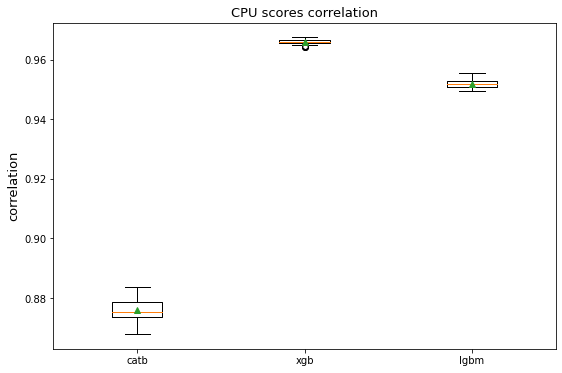

In [26]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)  
bp = ax.boxplot([catb_corr_cpu,xgb_corr_cpu, lgbm_corr_cpu], showmeans=True)
plt.xticks([1,2,3], ['catb', 'xgb', 'lgbm'])
plt.ylabel('correlation', fontsize=13)
plt.title("CPU scores correlation", fontsize=13)
plt.show()

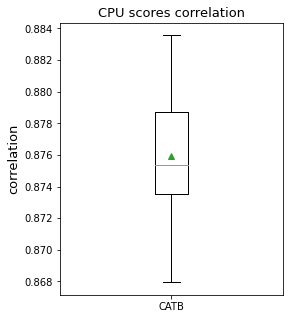

In [27]:
fig = plt.figure(1, figsize=(4, 5))
ax = fig.add_subplot(111)  
bp = ax.boxplot([catb_corr_cpu], showmeans=True)
plt.xticks([1], ['CATB'])
plt.ylabel('correlation', fontsize=13)
plt.title("CPU scores correlation", fontsize=13)
plt.show()

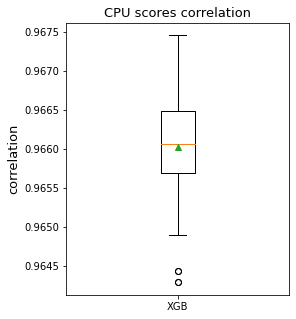

In [28]:
fig = plt.figure(1, figsize=(4, 5))
ax = fig.add_subplot(111)  
bp = ax.boxplot([xgb_corr_cpu], showmeans=True)
plt.xticks([1], ['XGB'])
plt.ylabel('correlation', fontsize=13)
plt.title("CPU scores correlation", fontsize=13)
plt.show()

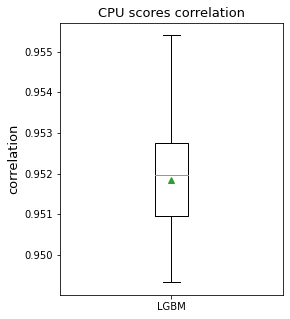

In [29]:
fig = plt.figure(1, figsize=(4, 5))
ax = fig.add_subplot(111)  
bp = ax.boxplot([lgbm_corr_cpu], showmeans=True)
plt.xticks([1], ['LGBM'])
plt.ylabel('correlation', fontsize=13)
plt.title("CPU scores correlation", fontsize=13)
plt.show()

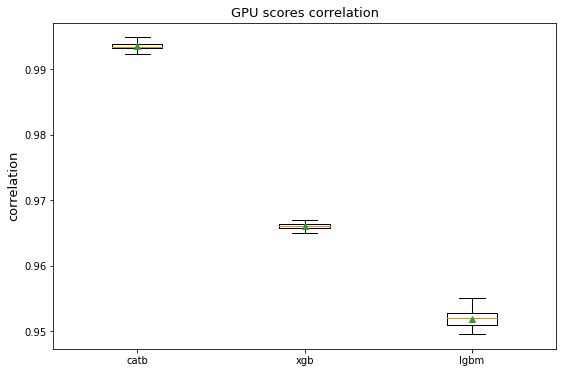

In [30]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)  
bp = ax.boxplot([catb_corr_gpu, xgb_corr_gpu, lgbm_corr_gpu], showmeans=True)
plt.xticks([1,2,3], ['catb', 'xgb', 'lgbm'])
plt.ylabel('correlation', fontsize=13)
plt.title("GPU scores correlation", fontsize=13)
plt.show()

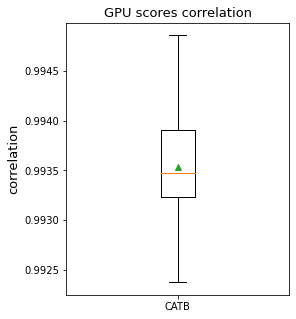

In [31]:
fig = plt.figure(1, figsize=(4,5))
ax = fig.add_subplot(111)  
bp = ax.boxplot([catb_corr_gpu], showmeans=True)
plt.xticks([1], ['CATB'])
plt.ylabel('correlation', fontsize=13)
plt.title("GPU scores correlation", fontsize=13)
plt.show()

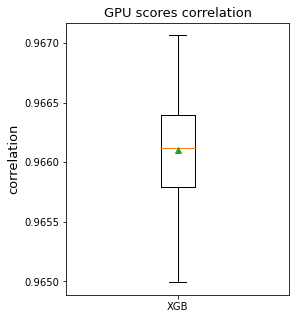

In [32]:
fig = plt.figure(1, figsize=(4, 5))
ax = fig.add_subplot(111)  
bp = ax.boxplot([xgb_corr_gpu], showmeans=True)
plt.xticks([1], ['XGB'])
plt.ylabel('correlation', fontsize=13)
plt.title("GPU scores correlation", fontsize=13)
plt.show()

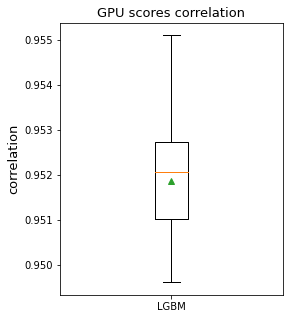

In [33]:
fig = plt.figure(1, figsize=(4, 5))
ax = fig.add_subplot(111)  
bp = ax.boxplot([lgbm_corr_gpu], showmeans=True)
plt.xticks([1], ['LGBM'])
plt.ylabel('correlation', fontsize=13)
plt.title("GPU scores correlation", fontsize=13)
plt.show()

### max ctr complexity

#### ctr ROC AUC dependence

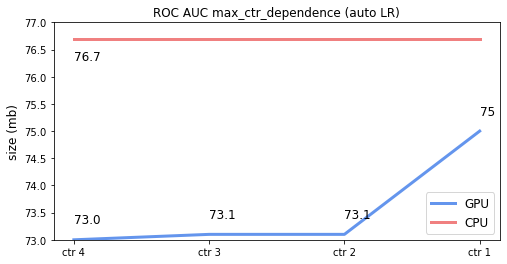

In [34]:
plt.figure(figsize=(8, 4))
x = ['ctr 4', 'ctr 3', 'ctr 2', 'ctr 1']

plt.plot(x, [73.0, 73.1, 73.1, 75.0] , label='GPU', color='cornflowerblue', linewidth=3)
plt.plot(x, [76.7, 76.7, 76.7, 76.7], label='CPU', color='lightcoral', linewidth=3)
plt.ylim(73, 77)
plt.xticks(x)
plt.ylabel('size (mb)', fontsize=12)
plt.title("ROC AUC max_ctr_dependence (auto LR)", )
plt.legend(fontsize=12, loc='lower right',)

plt.text('ctr 4', 76.3, str(76.7), fontsize=12)

y = [73.0, 73.1, 73.1, 75]
for a,b in zip(x, y): 
    plt.text(a, b+0.3, str(b), fontsize=12)
    
plt.show()

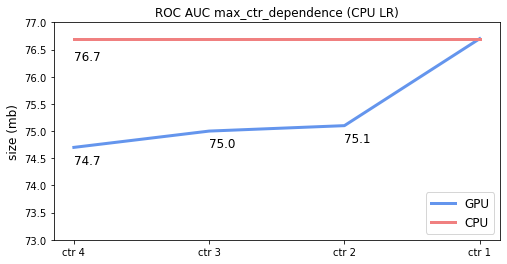

In [35]:
plt.figure(figsize=(8, 4))
x = ['ctr 4', 'ctr 3', 'ctr 2', 'ctr 1']

plt.plot(x, [74.7, 75.0, 75.1, 76.7] , label='GPU', color='cornflowerblue', linewidth=3)
plt.plot(x, [76.7, 76.7, 76.7, 76.7], label='CPU', color='lightcoral', linewidth=3)
plt.ylim(73, 77)
plt.xticks(x)
plt.ylabel('size (mb)', fontsize=12)
plt.title("ROC AUC max_ctr_dependence (CPU LR)")
plt.legend(fontsize=12, loc='lower right',)

plt.text('ctr 4', 76.3, str(76.7), fontsize=12)

y = [74.7, 75.0, 75.1, ]
for a,b in zip(x, y): 
    plt.text(a, b-0.3, str(b), fontsize=12)
    
plt.show()

#### ctr size dependence

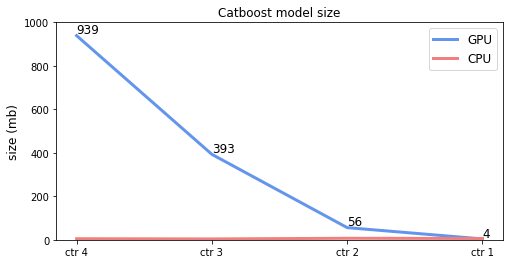

In [36]:
plt.figure(figsize=(8, 4))
x = ['ctr 4', 'ctr 3', 'ctr 2', 'ctr 1']
 
plt.plot(x, [939, 393, 56, 4] , label='GPU', color='cornflowerblue', linewidth=3)
plt.plot(x, [5, 4, 7, 6], label='CPU', color='lightcoral', linewidth=3)
plt.ylim(0, 1000)
plt.xticks(x)
plt.ylabel('size (mb)', fontsize=12)
plt.title("Catboost model size")
plt.legend(fontsize=12)

y = [939, 393, 56, 4]
for a,b in zip(x, y): 
    plt.text(a, b+10, str(b), fontsize=12)
    
plt.show()